<a href="https://colab.research.google.com/github/DimpleB0501/eva8/blob/main/Session_7_Assignment_QnA/Session_7_Assignment_QnA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
%matplotlib inline

In [2]:
!pip install --upgrade albumentations
!pip3 install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 6.1 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=2f6d94b12901638f4ad1d6f85dbecabf43e40fd23efc7b0818d1de55a2ddeef8
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


# GPU check

In [3]:
import torch
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)


CUDA Available? True


# Importing python files from github

In [4]:
!ls
!rm -rf .git
!rm -rf eva_base_code
!ls

sample_data
sample_data


In [5]:
!git clone https://github.com/DimpleB0501/eva_base_code.git

Cloning into 'eva_base_code'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 94 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (94/94), 24.64 KiB | 1.03 MiB/s, done.


In [6]:
cd eva_base_code

/content/eva_base_code


In [7]:
from eva_base_code.models import resnet
import main
import utils

# Classes

In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Data transforms

In [9]:
import torch
import torchvision

In [10]:
mean, std = utils.data_param()
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=utils.train_transform_func(mean, std))
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=utils.test_transform_func(mean, std))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


In [11]:
trainloader, testloader = main.split_data_set(trainset, testset, cuda)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Show training images

 ship  bird   cat   dog  bird


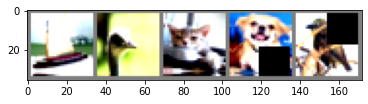

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:5]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

# Importing Resnet model

In [13]:
from torchsummary import summary
device = torch.device("cuda" if cuda else "cpu")
print(device)
model = resnet.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

# Train and test

In [14]:
num_epochs = 20 # change to 20
learning_rate = 0.01 #0.025 # change to 0.01
train_acc, train_losses, test_acc, test_losses = main.start_training_process(model, device, trainloader, testloader, optimizer = 'SGD', learning_rate = learning_rate, epochs = num_epochs)

EPOCH: 1


Loss=1.3704923391342163 Batch_id=195 Accuracy=44.69: 100%|██████████| 196/196 [00:43<00:00,  4.51it/s]



Test set: Average loss: 0.0054, Accuracy: 5293/10000 (52.93%)

EPOCH: 2


Loss=0.9422168731689453 Batch_id=195 Accuracy=62.02: 100%|██████████| 196/196 [00:44<00:00,  4.43it/s]



Test set: Average loss: 0.0042, Accuracy: 6234/10000 (62.34%)

EPOCH: 3


Loss=0.8292900919914246 Batch_id=195 Accuracy=69.60: 100%|██████████| 196/196 [00:45<00:00,  4.34it/s]



Test set: Average loss: 0.0033, Accuracy: 7112/10000 (71.12%)

EPOCH: 4


Loss=0.6878198385238647 Batch_id=195 Accuracy=74.85: 100%|██████████| 196/196 [00:44<00:00,  4.39it/s]



Test set: Average loss: 0.0029, Accuracy: 7483/10000 (74.83%)

EPOCH: 5


Loss=0.7160760164260864 Batch_id=195 Accuracy=77.53: 100%|██████████| 196/196 [00:44<00:00,  4.38it/s]



Test set: Average loss: 0.0029, Accuracy: 7651/10000 (76.51%)

EPOCH: 6


Loss=0.40146246552467346 Batch_id=195 Accuracy=80.18: 100%|██████████| 196/196 [00:44<00:00,  4.38it/s]



Test set: Average loss: 0.0023, Accuracy: 8062/10000 (80.62%)

EPOCH: 7


Loss=0.49191316962242126 Batch_id=195 Accuracy=82.28: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]



Test set: Average loss: 0.0024, Accuracy: 8165/10000 (81.65%)

EPOCH: 8


Loss=0.4355039596557617 Batch_id=195 Accuracy=83.80: 100%|██████████| 196/196 [00:44<00:00,  4.40it/s]



Test set: Average loss: 0.0023, Accuracy: 8086/10000 (80.86%)

EPOCH: 9


Loss=0.3810735046863556 Batch_id=195 Accuracy=85.16: 100%|██████████| 196/196 [00:44<00:00,  4.39it/s]



Test set: Average loss: 0.0021, Accuracy: 8218/10000 (82.18%)

EPOCH: 10


Loss=0.4686811566352844 Batch_id=195 Accuracy=86.11: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]



Test set: Average loss: 0.0023, Accuracy: 8183/10000 (81.83%)

EPOCH: 11


Loss=0.45535045862197876 Batch_id=195 Accuracy=87.46: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]



Test set: Average loss: 0.0020, Accuracy: 8357/10000 (83.57%)

EPOCH: 12


Loss=0.37314754724502563 Batch_id=195 Accuracy=88.16: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]



Test set: Average loss: 0.0021, Accuracy: 8458/10000 (84.58%)

EPOCH: 13


Loss=0.2746150493621826 Batch_id=195 Accuracy=89.06: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]



Test set: Average loss: 0.0022, Accuracy: 8382/10000 (83.82%)

EPOCH: 14


Loss=0.1866123080253601 Batch_id=195 Accuracy=89.69: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]



Test set: Average loss: 0.0019, Accuracy: 8554/10000 (85.54%)

EPOCH: 15


Loss=0.3196842074394226 Batch_id=195 Accuracy=90.46: 100%|██████████| 196/196 [00:44<00:00,  4.37it/s]



Test set: Average loss: 0.0017, Accuracy: 8680/10000 (86.80%)

EPOCH: 16


Loss=0.2880744934082031 Batch_id=195 Accuracy=91.04: 100%|██████████| 196/196 [00:45<00:00,  4.32it/s]



Test set: Average loss: 0.0020, Accuracy: 8520/10000 (85.20%)

EPOCH: 17


Loss=0.24265392124652863 Batch_id=195 Accuracy=91.52: 100%|██████████| 196/196 [00:44<00:00,  4.36it/s]



Test set: Average loss: 0.0020, Accuracy: 8585/10000 (85.85%)

EPOCH: 18


Loss=0.2872697114944458 Batch_id=195 Accuracy=92.02: 100%|██████████| 196/196 [00:45<00:00,  4.35it/s]



Test set: Average loss: 0.0020, Accuracy: 8544/10000 (85.44%)

EPOCH: 19


Loss=0.20469434559345245 Batch_id=195 Accuracy=92.40: 100%|██████████| 196/196 [00:44<00:00,  4.38it/s]



Test set: Average loss: 0.0017, Accuracy: 8707/10000 (87.07%)

EPOCH: 20


Loss=0.1374509632587433 Batch_id=195 Accuracy=92.80: 100%|██████████| 196/196 [00:44<00:00,  4.38it/s]



Test set: Average loss: 0.0018, Accuracy: 8722/10000 (87.22%)



### Plot training and test accuracies

Text(0.5, 1.0, 'Test Accuracy')

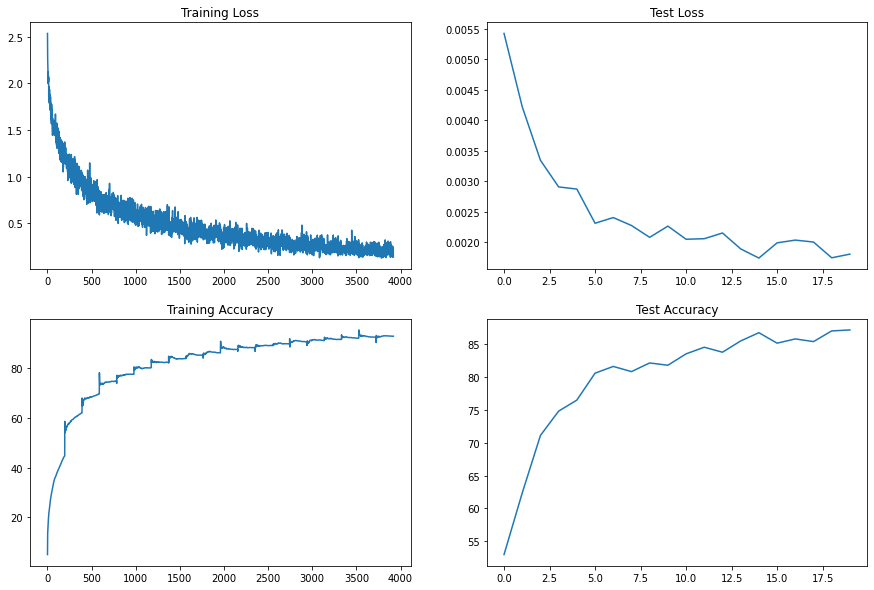

In [15]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

# 10/20 Misclassified images

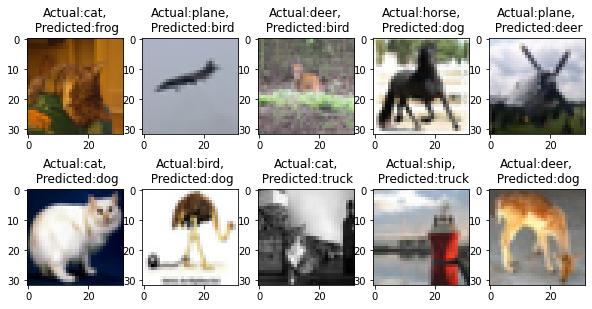

In [16]:
true,pred,image,true_wrong,pred_wrong = utils.test_missclassified(testloader, model)
utils.wrong_plot(10,true_wrong,image,pred_wrong, mean, std)

# 10/20 Misclassifed images with GradCam implementation

In [17]:
criterion = torch.nn.CrossEntropyLoss()
normalize = torchvision.transforms.Normalize(mean=mean,
                                     std=std)

encoder = {}
for i in range(len(classes)):
    encoder[i] = classes[i]

tensor(1.7035, device='cuda:0', dtype=torch.float64) 0.8706747898831964
Classes in order Actual and Predicted


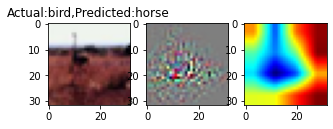

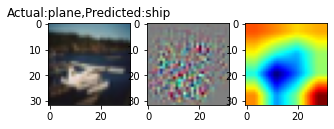

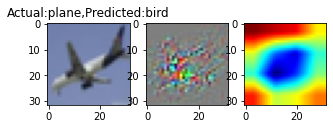

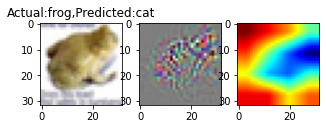

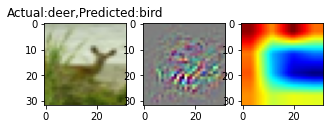

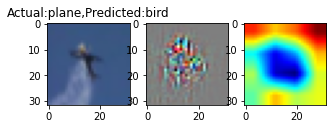

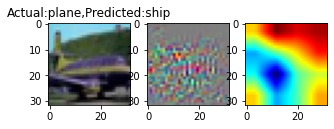

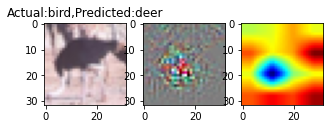

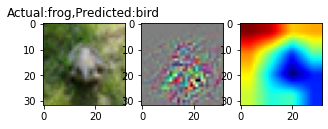

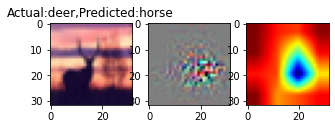

In [18]:
true,pred,image,true_wrong,pred_wrong = utils.gradcam_test(testloader, model)
target = model.layer4
utils.gradcam_wrong_plot(10,true_wrong,image,pred_wrong,encoder, target, model, mean, std)